In [1]:
import numpy as np
import pandas as pd
from nltk.corpus import twitter_samples
from nlp import get_freq, preprocess_tweet
import matplotlib.pyplot as plt

### Data

In [2]:
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

X_train = positive_tweets[:4000] + negative_tweets[:4000] 
X_test = positive_tweets[4000:] + negative_tweets[4000:]

y_train = np.append(np.ones((4000)), np.zeros((4000)))
y_test = np.append(np.ones((1000)), np.zeros((1000)))

### Frequency dictionary

In [3]:
train_dict = get_freq(X_train,y_train)

In [4]:
print("Some samples from the dict:\n", "- :p (+)", train_dict[(':p', 1.0)], "\n", "- hate (-)", train_dict[('hate', 0.0)] )
print("\nThere are",len(train_dict),"words in the frequency table")

Some samples from the dict:
 - :p (+) 103 
 - hate (-) 45

There are 11405 words in the frequency table


# 1 - Logistic regression

In [5]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [21]:
def gradientDescent(x, y, theta, learning_rate, it):
    
    m = len(x)
    J = 0.
    hist = []
    
    for i in range(it):
        z = np.dot(x,theta)
        yhat = sigmoid(z)
        J = -1./m * (np.dot(y.transpose(), np.log(yhat)) + np.dot((1-y).transpose(),np.log(1-yhat)))
        theta = theta - (learning_rate/m) * np.dot(x.transpose(),(yhat-y))
        hist.append(float(J))
        
    J = float(J)
    
    return hist, J, theta

# 2 - Create word vector

In [7]:
def create_vector(tweet, freq):
    
    processed = preprocess_tweet(tweet)
    x = np.zeros((1,3))
    x[0,0] = 1
    
    for word in processed:
            x[0,1] += freq.get((word,1.),0)
            x[0,2] += freq.get((word,0.),0)
            
    return x

In [8]:
print(" Bias,   (+),   (-)\n",create_vector(X_train[0],train_dict).tolist())

 Bias,   (+),   (-)
 [[1.0, 3020.0, 61.0]]


# 3 - Training model

In [9]:
X_train_vectors = np.zeros((len(X_train),3))

for tweet in range(len(X_train)):
    X_train_vectors[tweet,:] = create_vector(X_train[tweet], train_dict)
    

In [26]:
hist, J, theta = gradientDescent(X_train_vectors, y_train.reshape(len(y_train),1), np.zeros((3, 1)), 1e-9, 4000)

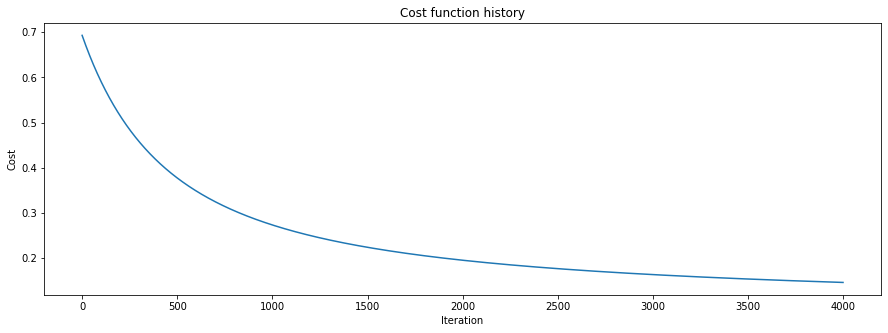

In [27]:
plt.figure(figsize=(15,5))
plt.plot(hist)
plt.title("Cost function history")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()

# 4 - Predict test set

In [33]:
def predict(tweet, theta, freq):
    x = create_vector(tweet,freq)
    z = np.dot(x,theta)
    a = sigmoid(z)
    if a > 0.5:
        return 1
    else:
        return 0

In [38]:
yhat = []
for tweet in X_test:
    yhat.append(predict(tweet, theta, train_dict))

In [62]:
correct = 0
for i in range(len(yhat)): 
    if int(yhat[i]) == int(y_test[i]):
        correct += 1
print("Accuracy:",correct/len(yhat))

Accuracy: 0.988


### Some errors

In [91]:
error = []
for i in range(len(yhat)): 
    if int(yhat[i]) != int(y_test[i]):
        error.append(i)

In [98]:
print("Tweet:",X_test[error[-1]],"\nPrediction:",yhat[error[-1]],"\nReal label:", int(y_test[error[-1]]))

Tweet: @ITVCentral #Midlands Yes thanks for the depressing weather forecast, where the word 'rain' was mentioned several times :-( 
Prediction: 1 
Real label: 0


In [99]:
print("Tweet:",X_test[error[-3]],"\nPrediction:",yhat[error[-3]],"\nReal label:", int(y_test[error[-3]]))

Tweet: @The5BallOver @Radio702 :-( It's not a challenge though. Please check our FB page for entries and rather do a substitution. Thanks! 
Prediction: 1 
Real label: 0


### Test

In [102]:
my_tweet = "Today we are all sad because we cannot do anything due the covid, so depressive, :("
predict(my_tweet,theta,train_dict)

0

In [103]:
my_tweet2 = "I am very happy because I'm learning a lot with this Coursera course"
predict(my_tweet2,theta,train_dict)

1